In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import seaborn as sn
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline


In [2]:
import os
import string 


In [3]:
train = pd.read_csv('imdb.csv', encoding = "ISO-8859-1", engine='python')
train.head(10)


,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt
5,5,test,"A funny thing happened to me while watching ""M...",neg,10004_2.txt
6,6,test,This German horror film has to be one of the w...,neg,10005_2.txt
7,7,test,"Being a long-time fan of Japanese film, I expe...",neg,10006_2.txt
8,8,test,"""Tokyo Eyes"" tells of a 17 year old Japanese g...",neg,10007_4.txt
9,9,test,Wealthy horse ranchers in Buenos Aires have a ...,neg,10008_4.txt


In [4]:
train=train[['review','label']]
train = train[train.label != "unsup"]
train['label'].value_counts()
train.head(10)

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg
5,"A funny thing happened to me while watching ""M...",neg
6,This German horror film has to be one of the w...,neg
7,"Being a long-time fan of Japanese film, I expe...",neg
8,"""Tokyo Eyes"" tells of a 17 year old Japanese g...",neg
9,Wealthy horse ranchers in Buenos Aires have a ...,neg


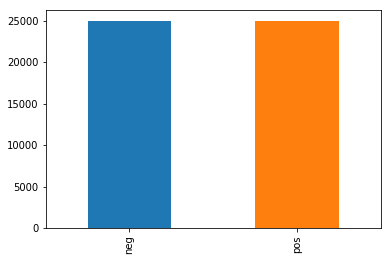

In [5]:
train['label'].value_counts().plot(kind='bar')

In [6]:
train.shape

(50000, 2)

In [7]:
train.columns

Index(['review', 'label'], dtype='object')

In [8]:
stop_list=["film","movie","story","character","show","scene","director","actors","br","watch","see"]
stopwords_set = set(stopwords.words("english")+stop_list)
stemmer=SnowballStemmer('english')
def cleaner(text):
    #text = re.sub('http:?.+|\@.+: ', '', text)
    #text = ''.join([i for i in text if not i.isdigit()])
    # Clean punctuation and symbols
    text = re.sub("[!@#$+<>&%\"*:();'-']", ' ', text)
    #text=[lemmatizer.lemmatize(word) for word in text if not word in stopwords_set]
    #re.sub('[^A-Za-z0-9]+', '', "Hello $#! People   Whitespace 7331")
    words_filtered = [e.lower() for e in text.split() if len(e)>=3]
    words_cleaned = [word for word in words_filtered
            if 'film' not in word
            if 'movie' not in word
            if 'story' not in word
            if 'show' not in word
            if 'character' not in word
            if 'scene' not in word
            if 'actor' not in word
            if 'director' not in word
            if 'play' not in word
            if 'watch' not in word
            and not word.startswith('@') 
            and not word.startswith('#')]
    words_without_stopwords = [stemmer.stem(word) for word in words_cleaned if not word in stopwords_set]
    return " ".join(words_without_stopwords)

In [9]:
cleaner('film movie story character show scene director actors br')

''

In [10]:
train['cleaned']= train['review'].apply(lambda x : cleaner(x))

In [11]:
train.head()

,review,label,cleaned
0,Once again Mr. Costner has dragged out a movie...,neg,mr. costner drag far longer necessary. asid te...
1,This is an example of why the majority of acti...,neg,"exampl major action same. generic boring, real..."
2,"First of all I hate those moronic rappers, who...",neg,"first hate moron rappers, could act gun press ..."
3,Not even the Beatles could write songs everyon...,neg,"even beatl could write song everyon liked, alt..."
4,Brass pictures (movies is not a fitting word f...,neg,brass pictur fit word realli somewhat brassy. ...


In [12]:
def dict(x) :
    if x=='pos':
        return 1
    else:
        return 0

In [13]:
train['sentiment_no']=train['label'].apply(lambda x: dict(x))

In [14]:
print (train.shape)

(50000, 4)


In [15]:
train.head(10)

,review,label,cleaned,sentiment_no
0,Once again Mr. Costner has dragged out a movie...,neg,mr. costner drag far longer necessary. asid te...,0
1,This is an example of why the majority of acti...,neg,"exampl major action same. generic boring, real...",0
2,"First of all I hate those moronic rappers, who...",neg,"first hate moron rappers, could act gun press ...",0
3,Not even the Beatles could write songs everyon...,neg,"even beatl could write song everyon liked, alt...",0
4,Brass pictures (movies is not a fitting word f...,neg,brass pictur fit word realli somewhat brassy. ...,0
5,"A funny thing happened to me while watching ""M...",neg,"funni thing happen mosquito one hand, hero dea...",0
6,This German horror film has to be one of the w...,neg,german horror one weirdest seen. awar connect ...,0
7,"Being a long-time fan of Japanese film, I expe...",neg,long-tim fan japanes expect this. realli bothe...,0
8,"""Tokyo Eyes"" tells of a 17 year old Japanese g...",neg,tokyo eye tell year old japanes girl fall like...,0
9,Wealthy horse ranchers in Buenos Aires have a ...,neg,wealthi hors rancher bueno air long-stand no-t...,0


In [16]:
train_data=train.sample(frac=0.8)
test_data=train.drop(train_data.index)
train_data.head(10)

,review,label,cleaned,sentiment_no
26354,This was a movie about infidelity and revenge....,neg,infidel revenge. twin twin connect sens someth...,0
9546,I am shocked by all the good reviews on the co...,neg,shock good review cover imdb. belong bin local...,0
49428,"The first time I saw this film, I was in shock...",pos,first time saw shock day afterwards. painstak ...,1
16874,I think the problem with this show not getting...,pos,think problem get respect truli deserv come se...,1
47431,"Cinematically, this film stinks. So does a lot...",pos,"cinematically, stinks. lot acting. care. stron...",1
16879,I need help identifying an episode of King of ...,pos,need help identifi episod king queens. begin d...,1
906,"""The Cave"" got released more or less simultane...",neg,cave got releas less simultan english descent ...,0
19103,"By mistake, I ordered a series from the BBC, t...",pos,"mistake, order seri bbc, new version robin hoo...",1
22918,I seriously enjoyed watching this movie for th...,pos,serious enjoy first time year ago whenev get a...,1
22877,This was Charlie Chaplin's first all-talking f...,pos,"charli chaplin first all-talk yes, littl bit s...",1


In [17]:
test_data.head(10)

,review,label,cleaned,sentiment_no
7,"Being a long-time fan of Japanese film, I expe...",neg,long-tim fan japanes expect this. realli bothe...,0
12,So tell me - what serious boozer drinks Budwei...,neg,tell serious boozer drink budweiser? mani suic...,0
17,Earth has been destroyed in a nuclear holocaus...,neg,"earth destroy nuclear holocaust. well, part ea...",0
21,"This is truly, without exaggerating, one of th...",neg,"truly, without exaggerating, one worst slasher...",0
22,I'm a huge fan of both Emily Watson (Breaking ...,neg,huge fan emili watson break wave tom wilkinson...,0
36,"I walked into a book store in Brentwood, Tenne...",neg,"walk book store brentwood, tennessee. go say n...",0
42,"I wanted to like this movie. I really, really ...",neg,"want like really, realli did. excit saw previe...",0
43,I am not understanding why people are praising...,neg,understand peopl prais like all. sever people....,0
46,BELL WITCH HAUNTING (aka THE HAUNT) is an Amer...,neg,bell witch haunt aka haunt american horror sup...,0
54,What if someone made a horror movie that was c...,neg,"someon made horror complet devoid plot? well, ...",0


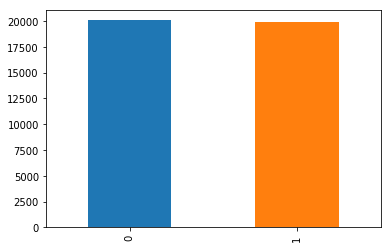

In [18]:
train_data['sentiment_no'].value_counts().plot(kind = 'bar')

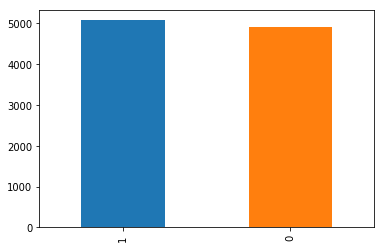

In [19]:
test_data['sentiment_no'].value_counts().plot(kind='bar')

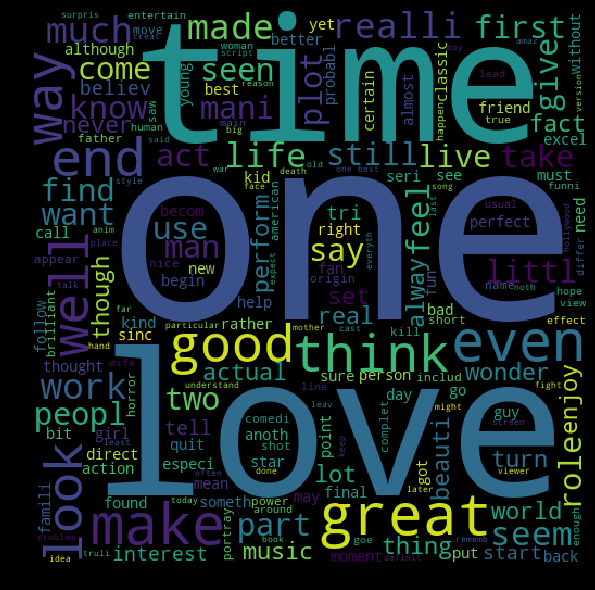

In [20]:
pos_comments = ' '.join(list(train_data[train_data['sentiment_no'] == 1]['cleaned']))
spam_wc = WordCloud(width = 512,height = 512).generate(pos_comments)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

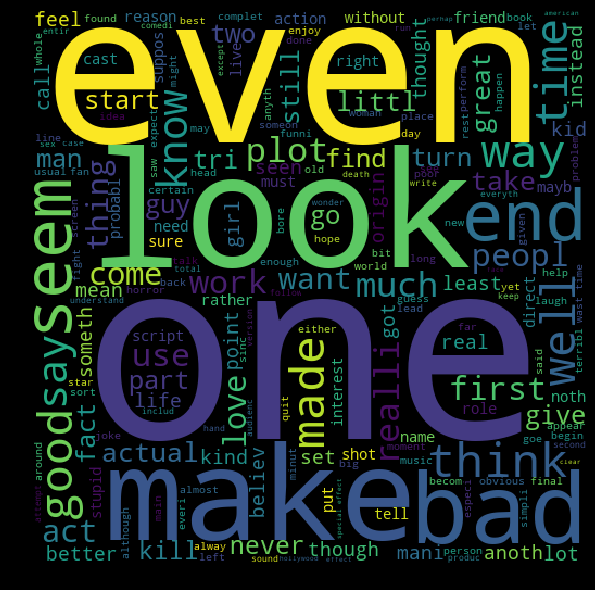

In [21]:
neg_comments = ' '.join(list(train_data[train_data['sentiment_no'] == 0]['cleaned']))
spam_wc = WordCloud(width = 512,height = 512).generate(neg_comments)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

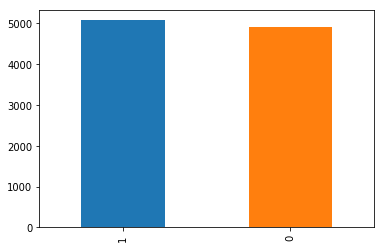

In [22]:
test_data['sentiment_no'].value_counts().plot(kind = 'bar')

In [23]:
tfidf_vect=TfidfVectorizer(stop_words='english', max_df=0.5)
tfidf_train=tfidf_vect.fit_transform(train_data['cleaned'])
train_label = train_data['sentiment_no']
# tfidf_test=tfidf_vect.transform(x_test)

In [24]:
print ("feature names: ", tfidf_vect.get_feature_names()[:10])

feature names:  ['00', '000', '00000000000', '0000000000001', '00000001', '00001', '000dm', '000s', '001', '0069']


In [25]:
nb_class=MultinomialNB(alpha=0.01)
nb_class.fit(tfidf_train,train_label)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [26]:
predictions = nb_class.predict(tfidf_vect.transform(test_data['review']))

In [27]:
## accurcay
np.mean(predictions == test_data['sentiment_no'])

0.8161

In [28]:
cm=metrics.confusion_matrix(test_data['sentiment_no'],predictions)
print ("Confusion marix: \n", cm)


Confusion marix: 
 [[3939  984]
 [ 855 4222]]


[Text(33.0, 0.5, 'pos                   neg'),
 Text(0.5, 15.0, 'neg                     pos')]

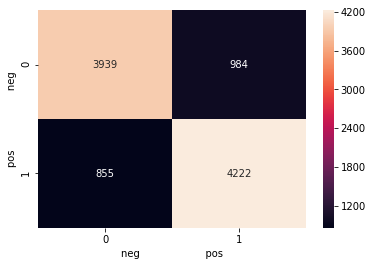

In [29]:
ax=sn.heatmap(cm, annot=True,fmt='d')
ax.set(xlabel='neg                     pos', ylabel='pos                   neg')

<h1> Testing in Scraped Data </h1>

In [80]:
test = pd.read_csv('scrape.csv')
test['cleaned'] = test['comment_text'].apply(lambda x : cleaner(x))


In [81]:
predictions = nb_class.predict(tfidf_vect.transform(test['cleaned']))

In [82]:
test['predicted']=predictions

In [83]:
test.to_csv('youtube_output.csv')

In [84]:
def predictor(text) :
    text=cleaner(text)
    return nb_class.predict(tfidf_vect.transform([text]))
    

In [85]:
predictor("the movie was exceptionally well scripted but aweful execution made it worse ")

array([0], dtype=int64)

In [86]:
tfidf_vect.transform(["even one end people"])

<1x86693 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [87]:
prediction_result=pd.read_csv('youtube_output.csv')
prediction_result.head(20)

,Unnamed: 0,id,comment_text,cleaned,predicted
0,0,0,we did it bois! the most disliked video in the...,boi dislik video youtube... youtub,0
1,1,1,all these dislikes remind me of an old meme......,dislik remind old meme... anotha one anotha on...,0
2,2,2,came here to check the dislikes. yep they're ...,came check dislikes. yep still,0
3,3,3,who's coming to this video just to check the d...,come video check dislikes?,0
4,4,4,this is how many brain cells i lost 👇,mani brain cell lost,0
5,5,5,i can't believe they didn't play sweet victory,believ sweet victori,1
6,6,6,15 million dislikes!! 😂😂 damnnn! 😂🔥,million dislik damnnn,0
7,7,7,i like how yt is deleting dislikes i’m going ...,like delet dislik i'm go keep dislik still...,0
8,8,8,this is the equivalent of an adult trying to b...,equival adult tri cool kid,0
9,9,9,it’s my honor to disliked this video,it honor dislik video,1


In [88]:
def reverse_dict(x) :
    if x==1:
        return "pos"
    else:
        return "neg"

In [89]:
prediction_result['sentiments']=prediction_result['predicted'].apply(lambda x: reverse_dict(x))

In [79]:
prediction_result.head(20)

,Unnamed: 0,id,comment_text,cleaned,predicted,sentiments
0,0,0,we did it bois! the most disliked video in the...,boi dislik video youtube... youtub,0,neg
1,1,1,all these dislikes remind me of an old meme......,dislik remind old meme... anotha one anotha on...,0,neg
2,2,2,came here to check the dislikes. yep they're ...,came check dislikes. yep still,0,neg
3,3,3,who's coming to this video just to check the d...,come video check dislikes?,0,neg
4,4,4,this is how many brain cells i lost 👇,mani brain cell lost,0,neg
5,5,5,if there's one thing that will bring people to...,one thing bring peopl togeth hate video.,0,neg
6,6,6,15 million dislikes!! 😂😂 damnnn! 😂🔥,million dislik damnnn,0,neg
7,7,7,i like how yt is deleting dislikes i’m going ...,like delet dislik i'm go keep dislik still...,0,neg
8,8,8,it’s my honor to disliked this video,it honor dislik video,1,pos
9,9,9,this is the equivalent of an adult trying to b...,equival adult tri cool kid,0,neg
